<img src="https://cdn.dal.ca/about-dal/history-tradition/logo-seal/_jcr_content/contentPar/staticimage.adaptive.full.high.png/1654529048363.png" alt="Dalogo" width="200"/>

# CSCI 4144 -  Data Mining and Data Warehousing
# Assignment 3 - Clustering and classification

**Due:** 15 March 2024, Anywhere-on-Earth

**Your name:** Ana Hernandez

**Your Banner ID:** B00858520

**Your NetID:** an504036

### Assessment

***!This cell is completed only by your marker!***


| #  | Section       |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Section 1     |     | / 8    |           |
| 2  | Section 2     |     | / 10    |           |
| 3  | Bonus         |     | / 3    |           |
| -  | TOTAL         |     | / 18    |           |

In [1]:
# import any libraries here
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# TODO: add any additional libraries here
import matplotlib.pyplot as plt
# your code should run in Python3

## Section 1 - Clustering

In this section, you will compare your own implementation of k-means against scikit-learn's implementation on two small datasets.

Please see scikit-learn's documentation on K-means [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). The answer to your question on how to use it is almost certainly there.

### Datasets

The first dataset, [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit), is a small dataset that could allow a bank to make decisions with regards to providing credit to customers. Every row in this dataset represents a hypothetical person. The column meanings should be self-explanatory from their names, but are not important in this assignment. The ***labels*** are in column `SeriousDlqin2yrs`; all other columns are ***observations***.

The second dataset is the famous [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is commonly used to introduce concepts of clustering and classification. We already saw this dataset in `Lec03.pca.ipynb`, which you have already downloaded and played with extensively, so you are already familiar with it. The ***labels*** are in column `species`; all other columns are ***observations***.

Here is one of the types of flower represented in this dataset: 
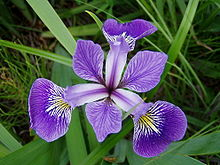
Pretty purple, huh?

You can use `df.head()` to see a sample of the data (including column names), and you can use `df.describe()` to obtain some simple statistics, for Pandas dataframe `df`.

### Tasks

Since the data actually have labels, we will ignore them for now. Using the rest of the data, write one function to assign each data point to its closest centroid, and another to compute new centroids, given data in a cluster. Write another function that combines these in the actual k-means algorithm, and then compare your implementation against scikit-learn

Complete each of the code cells below according to the instructions in the comments. For each section, markers may take away marks for excessively poor quality code, at their discretion.



In [2]:
# 1. load the data in Pandas DataFrames. 
#    Separate each dataset into independent observations/features data (XDeli and XIris) and outcome labels (yDeli and yIris). 
#    You can perform this separation in two lines, for each dataset. Look up the pandas 'drop()' function and indexing if you need to. 

dataDeli = pd.read_csv('https://github.com/davidjohnnn/all_datasets/raw/master/bay/cs-training.csv').drop('Unnamed: 0', axis = 1)
dataIris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv') # the `datasets.load_iris()` fcn is similar but different

dataDeli.dropna(axis=0, inplace=True)
dataIris.dropna(axis=0, inplace=True)

# TODO: your code goes here, below. Be sure to handle potential errors. 
#   
# For dataDeli: The *labels* are in column `SeriousDlqin2yrs`; all other columns are *observations*.
XDeli = dataDeli[dataDeli.columns[1:]]
yDeli = dataDeli['SeriousDlqin2yrs']

# For dataIris: The *labels* are in column `species`; all other columns are *observations*.
XIris = dataIris[dataIris.columns[:-1]]
yIris = dataIris['species']



In [3]:
# 2. Find the closest centroids to each datum. Use the sum of squared distances for each column.
#    
def findNearestCentroids(X, centroids):
#        inputs:  'X':          pandas df      A complete pandas dataframe of observations data.
#                 'centroids':  pandas df      A dataframe holding the K centroids (there are K rows), 
#                                              with the same column types as X.   
#        output:  'assign':     list of ints   A mapping of the data in X with the centroids in 'centroids'
#                                              i.e., if row 42 in 'X' is closest to row 3 in 'centroids', 
#                                                    then element 42 in 'assign' is '3'.

    # TODO: your code goes here
    """
    Thought process:
    - This is unsupervised learning
    """

    sow = []
    for _, s in centroids.iterrows():
        tmp = []
        tmp += (i for i in s)
        sow += [tmp]    
    square_dist = [np.sqrt(np.sum((X.values-np.array(i))**2, axis=1)) for i in sow]
    tmp_min = np.argmin(square_dist, axis=0)
    indexes = list(X.index)
    assign = {i:k for i, k in zip(indexes, tmp_min)}
    return assign

In [4]:
# 3. Find centroids. For each cluster 'i', defined by indices in 'assign', compute the mean value and 
#                    return it in the ith row of 'centroids'
#
def findCentroids(X, idx, k):
#        inputs:  'X':          pandas df      A complete pandas dataframe of observations data.
#                 'assign':     list of ints   The same list of ints as the output of 'findNearestCentroids'
#                 'k':          integer        The hyper-parameter 'k'
#        output:  'centroids':  pandas df      A dataframe holding the K centroids (there are K rows), 
#                                              with the same column types as X.  

    # TODO: your code goes here
    series = pd.Series(idx)
    grouped = series.groupby(series)
    
    centroids = pd.DataFrame(columns=X.columns)
    for key, values in grouped:
        #print(f"[+] Finding centroids {key}/{k-1}", end='\r')
        tmp = X.loc[list(values.index)].sum()
        centroids.loc[len(centroids)] = tmp/len(list(values.index))
    return centroids

In [5]:
centroids = XIris.sample(n=5)
indx = findNearestCentroids(XIris, centroids)
print(findCentroids(XIris, indx, 5))

   sepal_length  sepal_width  petal_length  petal_width
0      6.675000     3.287500      5.812500     2.350000
1      4.837838     3.135135      1.632432     0.316216
2      7.500000     3.081818      6.318182     2.009091
3      6.113158     2.831579      4.710526     1.600000
4      5.388889     3.733333      1.627778     0.316667


In [6]:
# 4. Run k-means clustering. Your initial centroids are random (without replacement) rows from 'X'
#
def my_kmeans( X, k, max_iter):
#        inputs:  'X':          pandas df      A complete pandas dataframe of observations data.
#                 'k':          integer        The hyper-parameter 'k'
#                 'max_iter':   integer        The hyper-parameter setting the maximum number of iterations to make
#        output:  'centroids':  pandas df      A dataframe holding the K centroids (there are K rows), 
#                                              with the same column types as X. 
#                 'assign':     list of ints   A mapping of the data in X with the centroids in 'centroids'
#                                              i.e., if row 42 in 'X' is closest to row 3 in 'centroids', 
#                                                    then element 42 in 'assign' is '3'.
    # TODO: your code goes here
    centroids = X.sample(n=k)
    for i in range(max_iter):
        #print(f"[+] Iteration {i}/{max_iter}")
        assign = findNearestCentroids(X, centroids)
        centroids = findCentroids(X, assign, k)
    #print('\n')
    return centroids, assign

Deli average for their means with k=2 == 3556.311958834711
Deli average for their means with k=3 == 3500.1896421107417
Deli average for their means with k=5 == 3275.0258856037167
Deli average for their means with k=10 == 1392.1585103874183
Iris average for k=2 == 1392.1585103874183
Iris average for k=3 == 1392.1585103874183
Iris average for k=5 == 1392.1585103874183
Iris average for k=10 == 1392.1585103874183


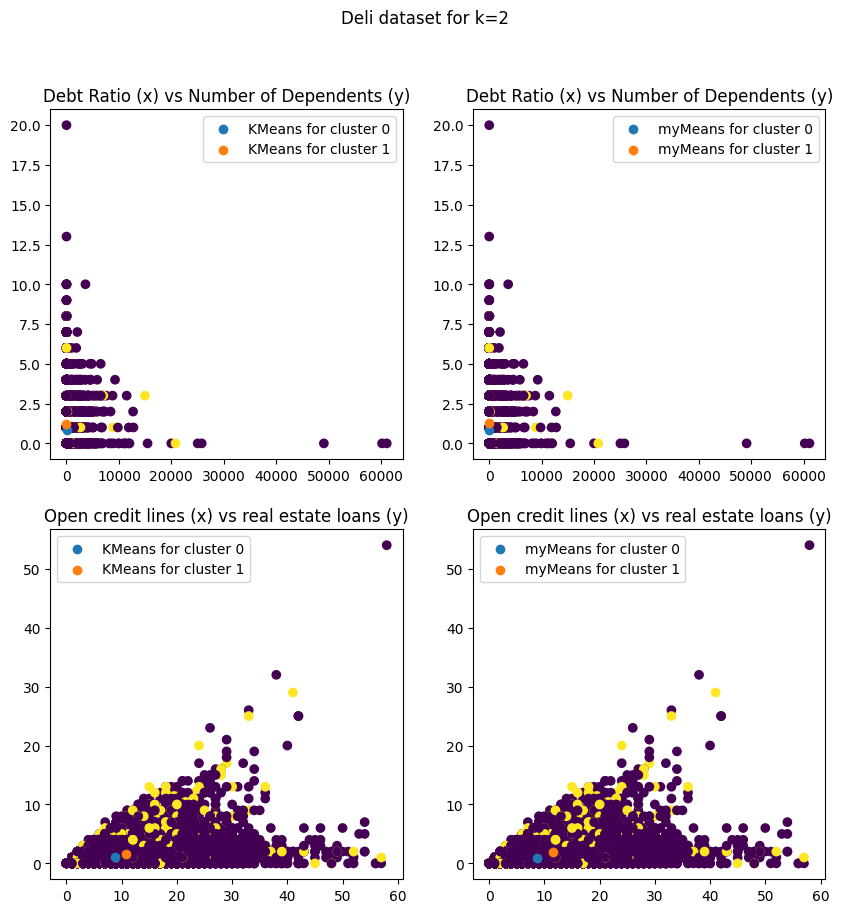

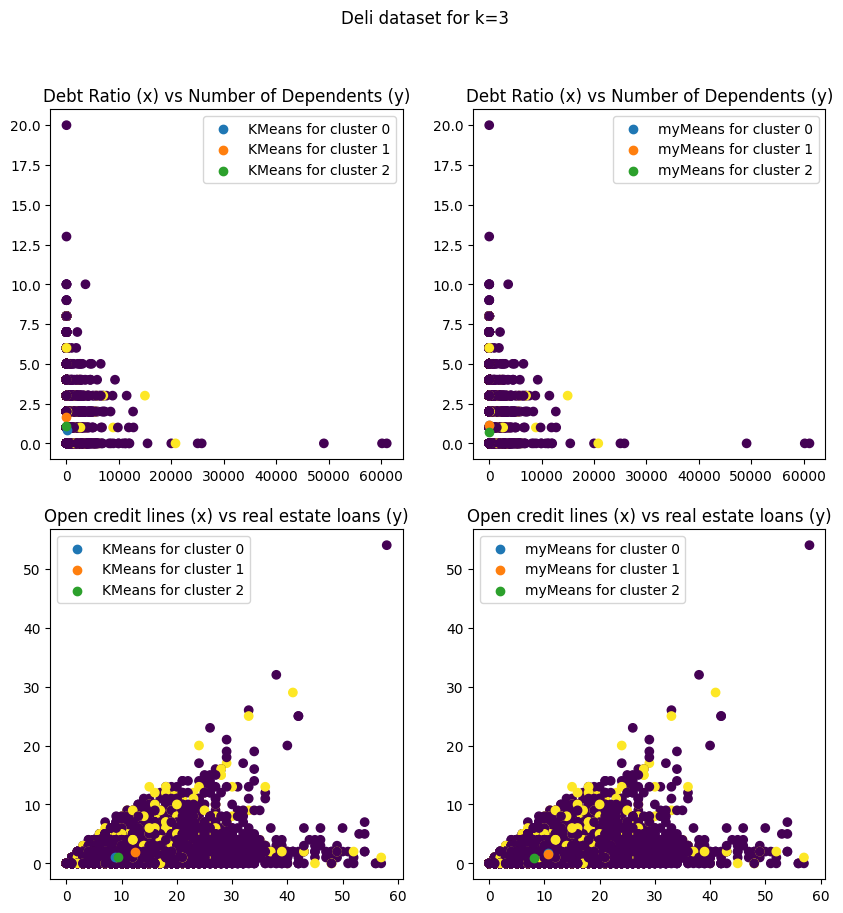

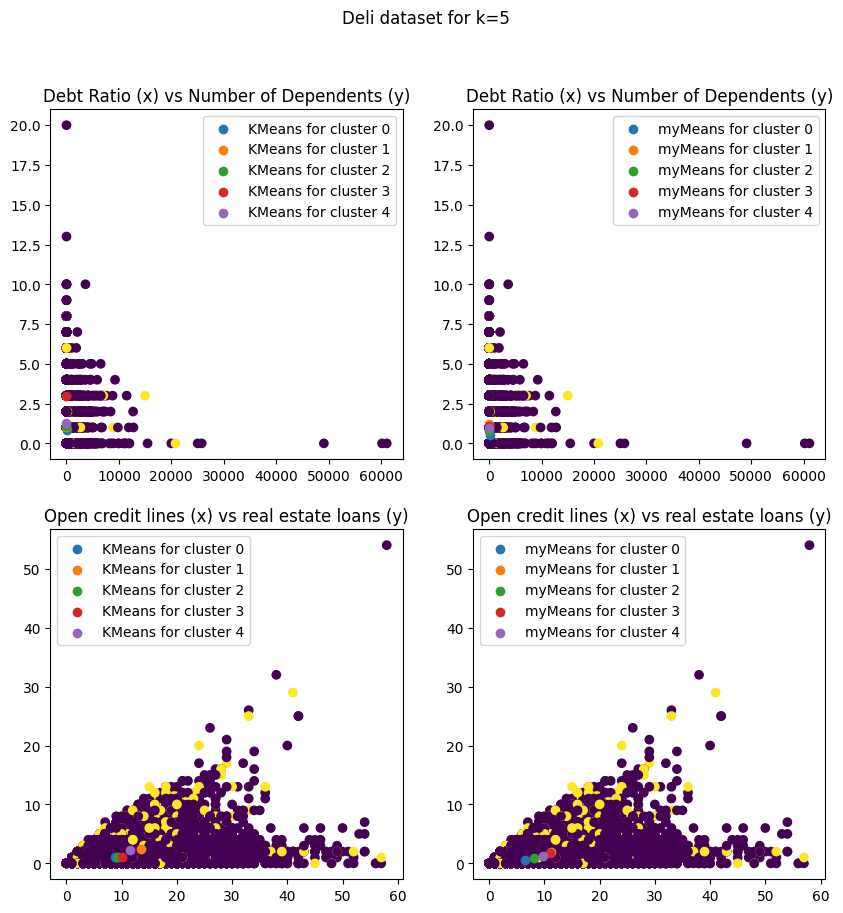

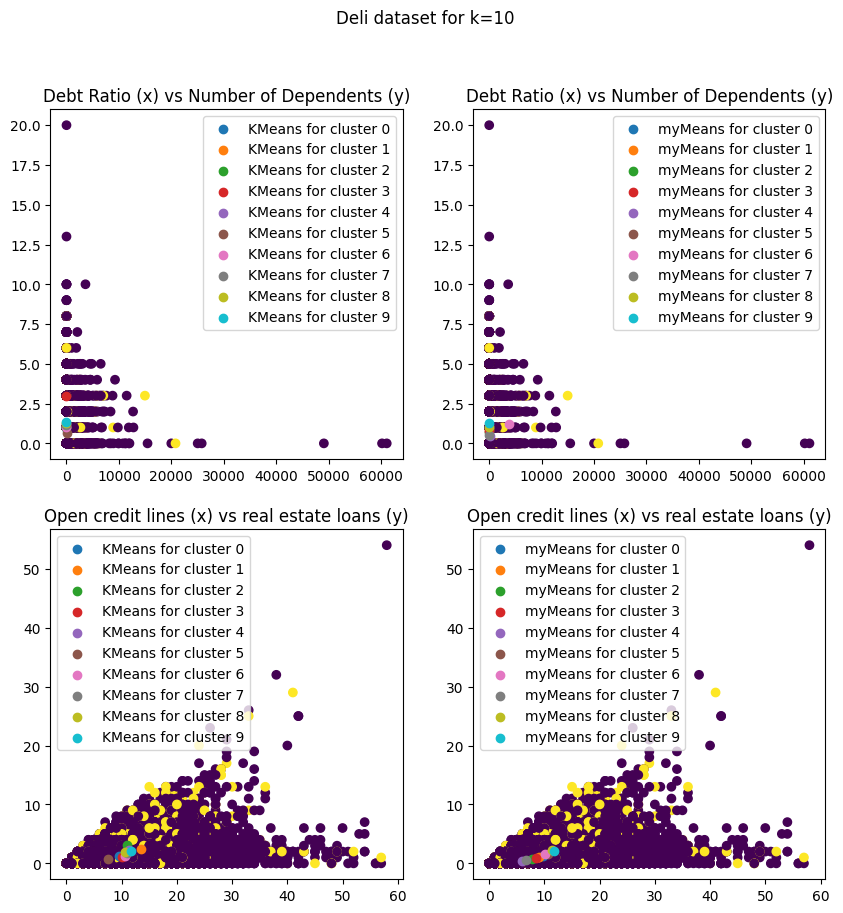

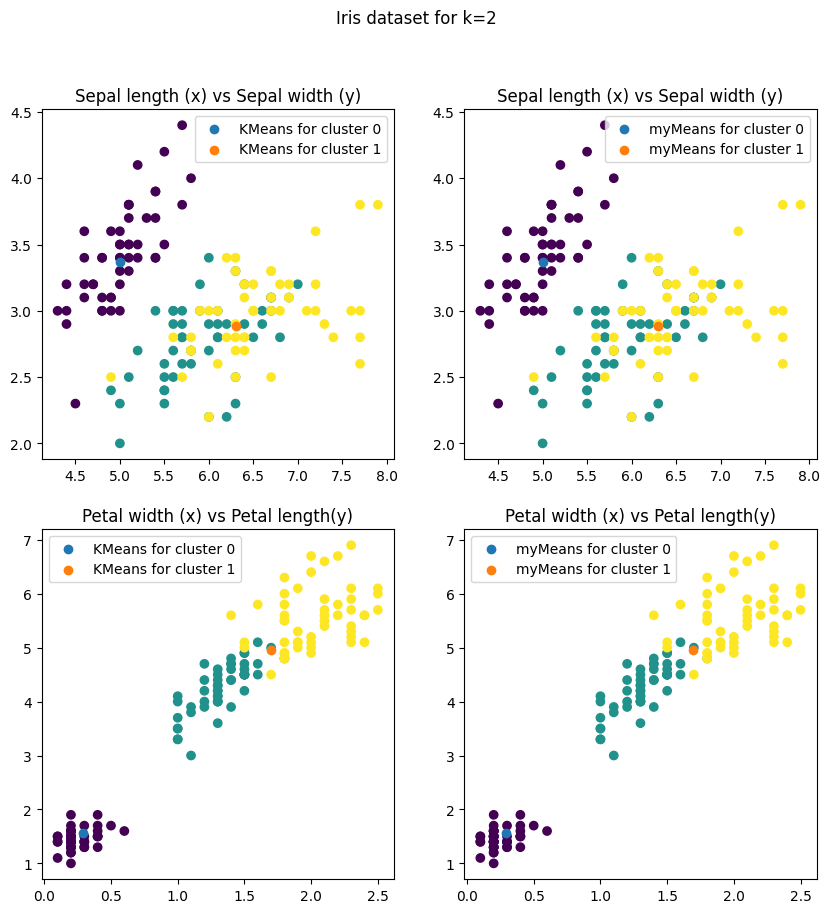

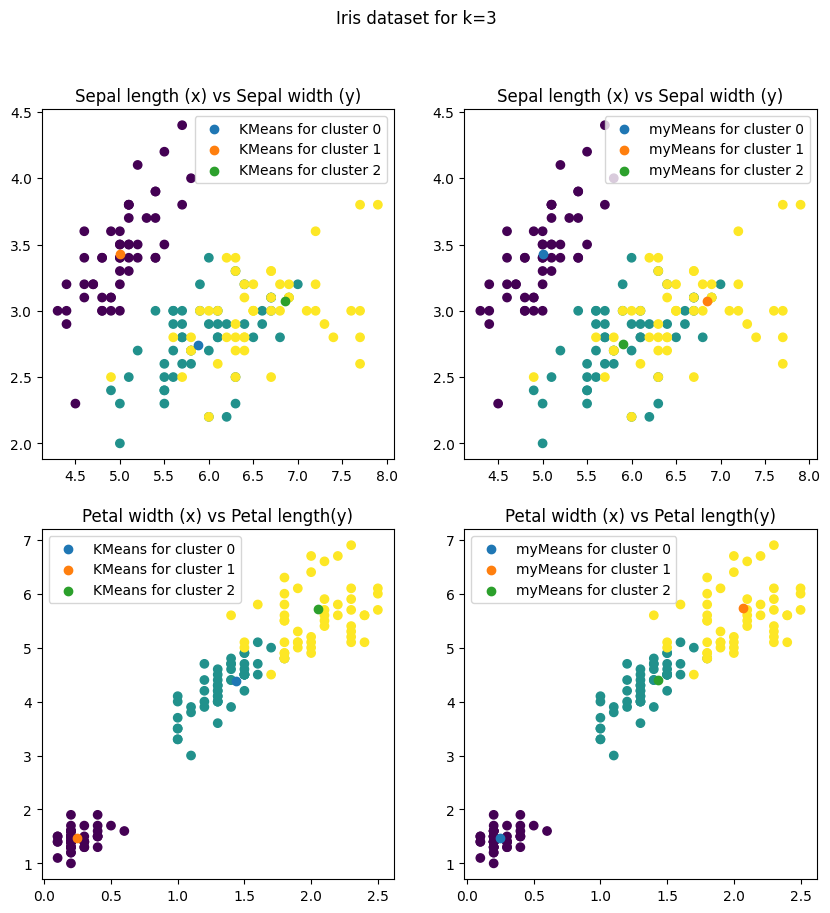

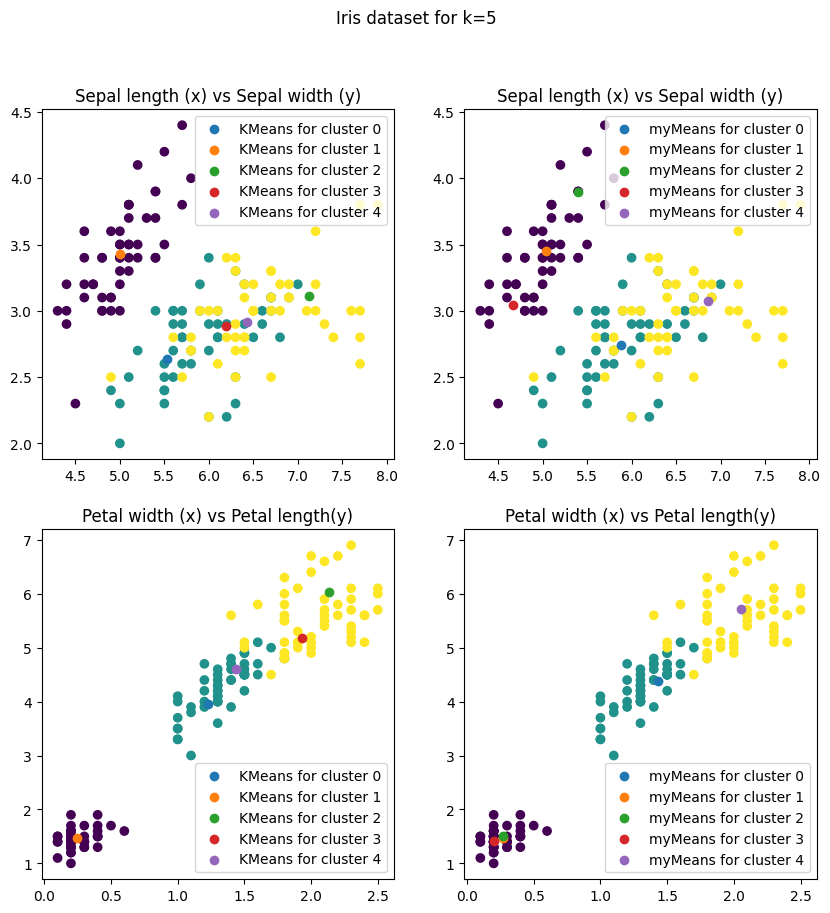

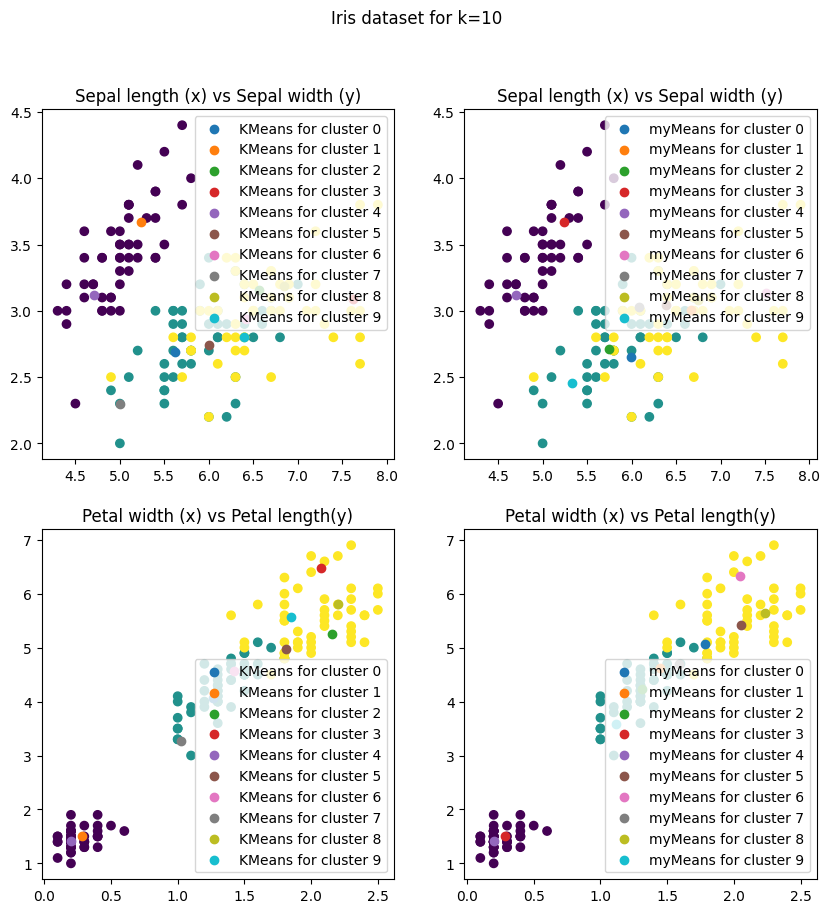

In [7]:
# 5. Run a very simple experiment. For different values of k (provided), map your centroids to the nearest 
#    centroids from scikit-learn's implementation, and then return the AVERAGE distance between nearest pairs
#    You might have realized that you can use your own findNearestCentroids function, since both arguments
#    are Pandas dataframes
#
#    The output will just be 8 floating point numbers -- one on each line for each value of k, below, on each of the two datasets.
#    Output results for the GiveMeSomeCredit data first, then the results from the Iris dataset
#    
max_iter = 10


for k in [2, 3, 5, 10]:
    
    # TODO: your code goes here, at least to select the appropriate data
    #       note that sklearn's 'fit' function takes numpy as input. 
    
    X = XDeli       # TODO this is one of your observations dataframes
    y = yDeli       # TODO this is one of your labels dataframes
    theirMeans = KMeans(n_clusters=k, random_state=0, max_iter=max_iter, n_init="auto").fit(X.to_numpy())
    myMeans,_  = my_kmeans( X, k, max_iter )
    # TODO: your code goes here
    fig, axDeli = plt.subplots(2, 2, figsize=(10, 10))
    # Debt Radio is #3, Income is #4
    # age is #1, Number ofDependents is #9
    # 30-59 days is #2, 60-80 days is #8
    # Open Credit is #5, Real state is #7

    square_dist = [np.sqrt(np.sum((XDeli.values-np.array(i))**2, axis=1)) for i in theirMeans.cluster_centers_]
    print(f"Deli average for their means with k={k} == {np.average(np.min(square_dist, axis=0))}")
    square_dist = [np.sqrt(np.sum((XDeli.values-np.array(i))**2, axis=1)) for i in theirMeans.cluster_centers_]

    fig.suptitle(f"Deli dataset for k={k}")
    axDeli[0][0].scatter(XDeli['DebtRatio'], XDeli['NumberOfDependents'], c=yDeli)
    for i, j in enumerate(theirMeans.cluster_centers_):
        axDeli[0][0].scatter(j[3], j[9], label=f"KMeans for cluster {i}")
    axDeli[0][0].set_title("Debt Ratio (x) vs Number of Dependents (y)")
    axDeli[0][0].legend()
    axDeli[0][1].scatter(XDeli['DebtRatio'], XDeli['NumberOfDependents'], c=yDeli)
    for i in range(k):
        axDeli[0][1].scatter(list(myMeans['DebtRatio'])[i], list(myMeans['NumberOfDependents'])[i], label=f"myMeans for cluster {i}")
    axDeli[0][1].set_title("Debt Ratio (x) vs Number of Dependents (y)")
    axDeli[0][1].legend()
    axDeli[1][0].scatter(XDeli['NumberOfOpenCreditLinesAndLoans'], XDeli['NumberRealEstateLoansOrLines'], c=yDeli)
    for i, j in enumerate(theirMeans.cluster_centers_):
        axDeli[1][0].scatter(j[5], j[7], label=f"KMeans for cluster {i}")
    axDeli[1][0].set_title("Open credit lines (x) vs real estate loans (y)")
    axDeli[1][0].legend()
    axDeli[1][1].scatter(XDeli['NumberOfOpenCreditLinesAndLoans'], XDeli['NumberRealEstateLoansOrLines'], c=yDeli)
    for i in range(k):
        axDeli[1][1].scatter(list(myMeans['NumberOfOpenCreditLinesAndLoans'])[i], list(myMeans['NumberRealEstateLoansOrLines'])[i], label=f"myMeans for cluster {i}")
    axDeli[1][1].set_title("Open credit lines (x) vs real estate loans (y)")
    axDeli[1][1].legend()
    plt.plot()

iris_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y_iris = yIris.map(iris_map)

for k in [2, 3, 5, 10]:
    X = XIris       # TODO this is one of your observations dataframes
    y = yIris       # TODO this is one of your labels dataframes
    theirMeans = KMeans(n_clusters=k, random_state=0, max_iter=max_iter, n_init="auto").fit(X.to_numpy())
    myMeans,_  = my_kmeans( X, k, max_iter )
    print(f"Iris average for k={k} == {np.average(np.min(square_dist, axis=0))}")
    
    # TODO: your code goes here
    fig, axIris = plt.subplots(2, 2, figsize=(10, 10))
    # sepal_length = 0
    # sepal_length = 1
    fig.suptitle(f"Iris dataset for k={k}")
    axIris[0][0].scatter(XIris['sepal_length'], XIris['sepal_width'], c=y_iris, cmap='viridis')
    for i, j in enumerate(theirMeans.cluster_centers_):
        axIris[0][0].scatter(j[0], j[1], label=f"KMeans for cluster {i}")
    axIris[0][0].set_title("Sepal length (x) vs Sepal width (y)")
    axIris[0][0].legend()
    axIris[0][1].scatter(XIris['sepal_length'], XIris['sepal_width'], c=y_iris, cmap='viridis')
    for i in range(k):
        axIris[0][1].scatter(list(myMeans['sepal_length'])[i], list(myMeans['sepal_width'])[i], label=f"myMeans for cluster {i}")
    axIris[0][1].set_title("Sepal length (x) vs Sepal width (y)")
    axIris[0][1].legend()
    axIris[1][0].scatter(XIris['petal_width'], XIris['petal_length'], c=y_iris, cmap='viridis')
    for i, j in enumerate(theirMeans.cluster_centers_):
        axIris[1][0].scatter(j[3], j[2], label=f"KMeans for cluster {i}")
    axIris[1][0].set_title("Petal width (x) vs Petal length(y)")
    axIris[1][0].legend()
    axIris[1][1].scatter(XIris['petal_width'], XIris['petal_length'], c=y_iris, cmap='viridis')
    for i in range(k):
        axIris[1][1].scatter(list(myMeans['petal_width'])[i], list(myMeans['petal_length'])[i], label=f"myMeans for cluster {i}")
    axIris[1][1].set_title("Petal width (x) vs Petal length(y)")
    axIris[1][1].legend()
    plt.plot()
    
    
    

In [8]:
print(theirMeans.cluster_centers_)
print(myMeans)

[[5.62083333 2.69166667 4.075      1.2625    ]
 [5.24285714 3.66785714 1.5        0.28214286]
 [6.56666667 3.15555556 5.25555556 2.15555556]
 [7.625      3.0875     6.475      2.075     ]
 [4.70454545 3.12272727 1.41363636 0.2       ]
 [6.         2.74375    4.975      1.8125    ]
 [6.41578947 2.93684211 4.56842105 1.42105263]
 [5.         2.3        3.275      1.025     ]
 [6.84166667 3.18333333 5.80833333 2.2       ]
 [6.4        2.8        5.5625     1.85      ]]
   sepal_length  sepal_width  petal_length  petal_width
0      5.992308     2.653846      5.069231     1.784615
1      6.663636     3.009091      4.627273     1.445455
2      5.750000     2.710000      4.230000     1.310000
3      5.242857     3.667857      1.500000     0.282143
4      4.704545     3.122727      1.413636     0.200000
5      6.390909     3.045455      5.427273     2.054545
6      7.509091     3.136364      6.336364     2.045455
7      6.080000     3.030000      4.700000     1.590000
8      6.746154     3.084

### Assessment for section 1

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Load          |     | / 1     |           |
| 2  | findNearestCentroids()  |     | / 2     |           |
| 3  | findCentroids()  |     | / 2     |           |
| 4  | my_kmeans()          |     | / 2     |           |
| 5  | experiments          |     | / 1     |           |
| -  | TOTAL         |     | / 8      |           |


## Section 2 - Classification

Here, we will actually make use of the labels in our two datasets to do some very simple classification. We will use three builtin classifiers from sklearn, use `fit()` to learn the models on training sets and use `predict()` to make predictions on test sets.

We will use:
- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [Support vector machines](https://scikit-learn.org/stable/modules/svm.html)
- [Simple neural networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised)

Complete each of the code cells below according to the instructions in the comments. For each section, markers may take away marks for excessively poor quality code, at their discretion.

In [9]:
# 1. Split each dataset into training and testing sets using sklearn's builtin `train_test_split` function
#    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.
#
#    Each dataset will have four variables: X_train, X_test, y_train, and y_test, for observations X and labels y

# TODO: your code goes here
XDeliTrain, XDeliTest, yDeliTrain, yDeliTest = train_test_split(XDeli, yDeli, train_size=.20, test_size=0.10)
XIrisTrain, XIrisTest, yIrisTrain, yIrisTest = train_test_split(XIris, yIris, test_size=0.25)


In [10]:
# 2. Scale the data. Some classifiers can have difficulty if the inputs are not normalized
#    We use sklearn's StandardScaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
#    

scalerDeli = StandardScaler()
scalerIris = StandardScaler()

# TODO scale only on the respective training data, using scaler.fit(X_train)
scalerDeli.fit(XDeliTrain)
scalerIris.fit(XIrisTrain)
# TODO now overwrite both the training and testing data with their scaled versions using  X = scaler.transform(X)
XDeliTrain = scalerDeli.transform(XDeliTrain)
XDeliTest = scalerDeli.transform(XDeliTest)

XIrisTrain = scalerIris.transform(XIrisTrain)
XIrisTest = scalerIris.transform(XIrisTest)

In [11]:
# 3. Train models. Each of the following models uses the fit(X,y) function, which learns a mapping from training observations X 
#                  to their respective labels y, which you already have for each dataset. Use the scaled inputs in all cases.
#                  You will have 6 models -- one for each model type in each of the two datasets.
#
#    For Naive Bayes, use https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
#                     with no parameters
#    For SVM, use https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
#             with kernel="poly", degree=3, gamma="auto", C=1.0
#    For the neural network, use https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
#                            with solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1
#

# TODO: your code goes here
# ----- Native Bayes ------
gaussian_modelDeli = GaussianNB()
gaussian_modelDeli.fit(XDeliTrain, yDeliTrain)

gaussian_modelIris = GaussianNB()
gaussian_modelIris.fit(XIrisTrain, yIrisTrain)

# ------- SVM ---------
svm_modelDeli = svm.SVC(C =1.0, kernel="poly", degree=3, gamma="auto")
svm_modelDeli.fit(XDeliTrain, yDeliTrain)

svm_modelIris = svm.SVC(C =1.0, kernel="poly", degree=3, gamma="auto")
svm_modelIris.fit(XIrisTrain, yIrisTrain)

# ------ NN --------
nn_modelDeli = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
nn_modelDeli.fit(XDeliTrain, yDeliTrain)

nn_modelIris = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)
nn_modelIris.fit(XIrisTrain, yIrisTrain)


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
              solver='lbfgs')

In [12]:
# 4. Make predictions. Each of the 6 models (that used the fit(X,y) function) also takes a precict(X) function that outputs
#                      predicted labels given data X, which will be our test data split from each dataset
#
#                      For each model, get the predictions on the test set of the respective dataset, and then compare
#                      these predictions against the known true labels (y_test) using the `classification_report` function
#                      (see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
#
#                      The output will just be 6 reports -- one for each classifier, on each of the two datasets.
#                      Output results for the GiveMeSomeCredit data first, then the results from the Iris dataset



# TODO: your code goes here
gaussian_predDeli = gaussian_modelDeli.predict(XDeliTest)
gaussian_predIris = gaussian_modelIris.predict(XIrisTest)

print("Gaussian model prediction Deli")
print(classification_report(yDeliTest, gaussian_predDeli))
print("Gaussian model prediction Iris")
print(classification_report(yIrisTest, gaussian_predIris))

svm_predDeli = svm_modelDeli.predict(XDeliTest)
svm_predIris = svm_modelIris.predict(XIrisTest)

print("svm model prediction Deli")
print(classification_report(yDeliTest, svm_predDeli))
print("svm model prediction Iris")
print(classification_report(yIrisTest, svm_predIris))


nn_predDeli = nn_modelDeli.predict(XDeliTest)
nn_predIris = nn_modelIris.predict(XIrisTest)

print("nn model prediction Deli")
print(classification_report(yDeliTest, nn_predDeli))
print("nn model prediction Iris")
print(classification_report(yIrisTest, nn_predIris))

Gaussian model prediction Deli
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11144
           1       0.20      0.04      0.06       883

    accuracy                           0.92     12027
   macro avg       0.57      0.51      0.51     12027
weighted avg       0.88      0.92      0.89     12027

Gaussian model prediction Iris
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

svm model prediction Deli
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11144
           1       0.62      0.01      0.02       883

    accuracy                           0

5. Add 2-3 sentences interpreting the output from the previous step. At the least, 1) compare overall results across datasets and try to explain why they may be different; 2) compare results across classifiers and try to explain why they may be different. There is no single right answer -- you are meant to show that you can read confusion matrices, that you know the basic theory behind the three classifiers, and that you can assess how differences in the datasets may relate to performance

TODO your observations go here

The first thing that grabs my attention is the difference of accuracy between Iris and Delta. Because of computational power, I used only a fraction of Delta's data set, it could happen that the data is unbalanced and therefore lacking in sufficient training set. 
Another thing is the difference between the gaussian results from SVMs and NNs. Gaussian model had the lowest accuracy while neural network had the highest for Deli database. Gaussian model rely on data following a distribution and frequencies, Deli does not seem to follow a straight distribution and could be the reason why it is performing poorly. SVMs and NN are better at cllassifying non linear behaviour, which could explain their results with Dali. 

### Assessment for section 2

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Split       |     | /1      |           |
| 2  | Scale          |     | /1    |           |
| 3  | Train  |     | /3      |           |
| 4  | Test   |     | /3      |           |
| 5  | Interpret |   | /2  | |
| -  | TOTAL         |     | /10     |           |

## Bonus [3 Marks]

- We will give up to 3 bonus marks for innovative work going substantially beyond the minimal requirements and, possibly, for in-class participation. 
- These marks can make up for marks lost in other sections of the assignment, but your overall mark for this assignment cannot exceed 100%. 
- You may decide to pursue any number of tasks of your own design related to this assignment, although you should consult with the instructor or the lead TA before embarking on such exploration, and the value of bonus work is left to the discretion of the markers. 
- Be sure to document your work sufficiently for the markers to understand what you're doing. You can add additional Code or MarkDown cells below, as necessary.
- Certainly, the rest of the assignment takes higher priority. 

Some ideas:

- In Section 1, check to see how well the discovered clusters actually map onto the real labels. That would be cool.
- Run PCA (see Lec03.pca.ipynb) on the data in Section 1 before running k-means and report on the differences in performance for different numbers of principal components used
- Run PCA (see Lec03.pca.ipynb) on the data in Section 2 before running classification and report on the differences in performance for different numbers of principal components used
- Explore the space of classifiers. Try different types of classifiers and different hyper-parameters (e.g., for SVMs, use different kernels; for neural networks, use different numbers of layers or nodes per layer). Report critically on the results you find.


In [13]:
# BONUS Section
# TODO YOUR CODE GOES HERE
# I don't know if this counts, but I made this in section 1 in the for loop as the clusters where being processed, 
# I don't know if that counts towards this Bonus point 

### Assessment for bonus section

***!This cell is completed only by your marker!***


| #  | Task          |Mark | Out of  |  Comments |
|----|---------------|-----|---------|-----------|
| 1  | Bonus         |     | /3      |           |


## Academic Integrity

The following is template information. If there is any ambiguity or contradiction with official Dalhousie University policies, those Dalhousie University policies take effect.

At Dalhousie University, we respect the values of academic integrity: honesty, trust, fairness, responsibility, and respect. As a student, adherence to the values of academic integrity and related policies is a requirement of being part of the academic community at Dalhousie University.

### What does academic integrity mean?

Academic integrity means being honest in the fulfillment of your academic responsibilities thus establishing mutual trust. Fairness is essential to the interactions of the academic community and is achieved through respect for the opinions and ideas of others. Violations of intellectual honesty are oﬀensive to the entire academic community, not just to the individual faculty member and students in whose class an oﬀence occur (See the Dalhousie Secretariat's page on [Academic Integrity](https://www.dal.ca/dept/university_secretariat/academic-integrity.html).

### How can you achieve academic integrity?

- Make sure you understand Dalhousie’s policies on academic integrity.
- Give appropriate credit to the sources used in your assignment such as written or oral work, computer codes/programs, artistic or architectural works, scientific projects,  performances,  web page designs, graphical representations, diagrams, videos, and images. Use [RefWorks](http://www.library.dal.ca/How/RefWorks) to keep track of your research and edit and format bibliographies in the citation style required by the instructor.
- Do not download the work of another from the Internet and submit it as your own.
- Do not submit work that has been completed through collaboration or previously submitted for another assignment without permission from your instructor.
- Do not write an examination or test for someone else.
- Do not falsify data or lab results.

These examples should be considered only as a guide and not an exhaustive list.

### What will happen if an allegation of an academic oﬀence is made against you?

The teaching team is required to report any suspected oﬀence. The full process is outlined in the Discipline flow chart, which can be found [here](https://cdn.dal.ca/content/dam/dalhousie/pdf/dept/university_secretariat/FDPflowchartSEpt2016.pdf) and includes the following:

1. Each Faculty has an Academic Integrity Oﬃcer (AIO) who receives allegations from instructors.
2. The AIO decides whether to proceed with the allegation and you will be notified of the process.
3. If the case proceeds, you will receive an INC (incomplete) grade until the matter is resolved.
4. If you are found guilty of an academic oﬀence, a penalty will be assigned ranging from a warning to a suspension or expulsion from the University and can include a notation on your transcript, failure of the assignment or failure of the course. All penalties are academic in nature.

### Where can you turn for help?

- If you are ever unsure about ANYTHING, contact the teaching team or lead instructor.
- The Academic Integrity website (http://academicintegrity.dal.ca) has links to policies, definitions, online tutorials, tips on citing and paraphrasing.
- The Writing Center provides assistance with proofreading, writing styles, citations.
- Dalhousie Libraries have workshops, online tutorials, citation guides, Assignment Calculator, RefWorks, etc.
- The Dalhousie Student Advocacy Service assists students with academic appeals and student discipline procedures.
- The Senate Oﬃce provides links to a list of Academic Integrity Oﬃcers, discipline flow chart, and Senate Discipline Committee.


## Academic offenses

There is a zero-tolerance policy on academic offenses such as plagiarism or inappropriate collaboration. By submitting your solution for this assignment, you acknowledge that the code submitted is your own work. You also agree that your code may be submitted to plagiarism detection software (such as MOSS) unless you have notified the teaching team otherwise, in writing, before the submission deadline. Any suspected act of plagiarism will be reported to the Faculty’s Academic Integrity Officer in accordance with Dalhousie University’s regulations regarding Academic Integrity. Please note that:

1. The assignments are individual assignments. You can discuss the problems with your friends/classmates, but you need to write your program by yourself. There should not be much similarity in terms of coding. 
2. When you refer to some online resources to complete your program, you need to understand the mechanism, then write your own code. Your code should not be similar to the online resources. In addition, you should cite the sources via comments in your program.

